# IB Scratchpad

References:
 - https://algotrading101.com/learn/interactive-brokers-python-api-native-guide/

In [72]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper  
from ibapi.contract import Contract

import threading
import time

class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []

    def tickPrice(self, reqId, tickType, price, attrib):
        if tickType == 2 and reqId == 1:
            print(tickType, ': The current ask price is: ', price)
    
    def historicalData(self, reqId, bar):
        #print(f'Time: {bar.date} Close: {bar.close}')
        self.data.append([bar.date, bar.open, bar.high, bar.low, bar.close])
        
def run_loop():
    app.run()

app = IBapi()
app.connect('host.docker.internal', 7496, 2)

api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()
time.sleep(0.5)



ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:cafarm
ERROR -1 2104 Market data farm connection is OK:eufarmnj
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:uscrypto
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:afarm
ERROR -1 2104 Market data farm connection is OK:jfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds.nj
ERROR -1 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefeu


In [24]:
apple_contract = Contract()
apple_contract.symbol = 'AAPL'
apple_contract.secType = 'STK'
apple_contract.exchange = 'SMART'
apple_contract.currency = 'USD'

#Request Market Data
app.reqMktData(1, apple_contract, '', False, False, [])

2 : The current ask price is:  164.41
2 : The current ask price is:  164.4
2 : The current ask price is:  164.41
2 : The current ask price is:  164.4
2 : The current ask price is:  164.41
2 : The current ask price is:  164.4
2 : The current ask price is:  164.41
2 : The current ask price is:  164.4
2 : The current ask price is:  164.41
2 : The current ask price is:  164.4
2 : The current ask price is:  164.39
2 : The current ask price is:  164.4
2 : The current ask price is:  164.39
2 : The current ask price is:  164.4
2 : The current ask price is:  164.39
2 : The current ask price is:  164.4
2 : The current ask price is:  164.39
2 : The current ask price is:  164.4
2 : The current ask price is:  164.41
2 : The current ask price is:  164.4
2 : The current ask price is:  164.41
2 : The current ask price is:  164.4
2 : The current ask price is:  164.39
2 : The current ask price is:  164.4
2 : The current ask price is:  164.39
2 : The current ask price is:  164.4
2 : The current ask price

ERROR -1 2103 Market data farm connection is broken:jfarm
ERROR -1 2103 Market data farm connection is broken:jfarm


2 : The current ask price is:  164.26


ERROR -1 2104 Market data farm connection is OK:jfarm
ERROR -1 2104 Market data farm connection is OK:jfarm


2 : The current ask price is:  164.27
2 : The current ask price is:  164.26
2 : The current ask price is:  164.27
2 : The current ask price is:  164.26
2 : The current ask price is:  164.27
2 : The current ask price is:  164.26
2 : The current ask price is:  164.25
2 : The current ask price is:  164.26
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.27
2 : The current ask price is:  164.28
2 : The current ask price is:  164.29
2 : The current ask price is:  164.28
2 : The curr

In [73]:
app.data = []

eurusd_contract = Contract()
eurusd_contract.symbol = 'EUR'
eurusd_contract.secType = 'CASH'
eurusd_contract.exchange = 'IDEALPRO'
eurusd_contract.currency = 'USD'

#Request historical candles
app.reqHistoricalData(1, eurusd_contract, '', '2 D', '1 hour', 'BID', 0, 2, False, [])

In [97]:
app.data = []

eurzar_contract = Contract()
eurzar_contract.symbol = 'EUR'
eurzar_contract.secType = 'CASH'
eurzar_contract.exchange = 'IDEALPRO'
eurzar_contract.currency = 'ZAR'

#Request historical candles
app.reqHistoricalData(1, eurzar_contract, '', '4 W', '4 hours', 'BID', 0, 2, False, [])


In [98]:
#Working with Pandas DataFrames
import pandas as pd
import numpy as np

df = pd.DataFrame(app.data, columns=['DateTime','Open', 'High', 'Low', 'Close'])

df.drop(['Open', 'High', 'Low'], axis=1, inplace=True)
df.rename(columns={'Close':'price'}, inplace=True)
df.rename(columns={'DateTime':'date'}, inplace=True)


#df = pd.DataFrame(app.data, columns=['DateTime','Close'])
df['10SMA'] = df['price'].rolling(10).mean()
df['30SMA'] = df['price'].rolling(30).mean()

df['date'] = pd.to_datetime(df['date'],unit='s') 
df = df.set_index('date')
#df.to_csv('EURUSD_Hourly.csv')  
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2023-03-26 21:15:00 to 2023-04-21 20:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   139 non-null    float64
 1   10SMA   130 non-null    float64
 2   30SMA   110 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


,price,10SMA,30SMA
date,,,
2023-04-21 04:00:00,19.83030,19.835255,19.907750
2023-04-21 08:00:00,19.90255,19.835230,19.909733
2023-04-21 12:00:00,19.84260,19.825490,19.907778
2023-04-21 16:00:00,19.88360,19.821250,19.907790
2023-04-21 20:00:00,19.85980,19.820075,19.903762


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2023-04-10 00:00:00 to 2023-04-21 20:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   237 non-null    float64
 1   10SMA   228 non-null    float64
 2   30SMA   208 non-null    float64
dtypes: float64(3)
memory usage: 7.4 KB


/tmp/ipykernel_14/1125554829.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: title={'center': 'EURZAR'}, xlabel='date'>

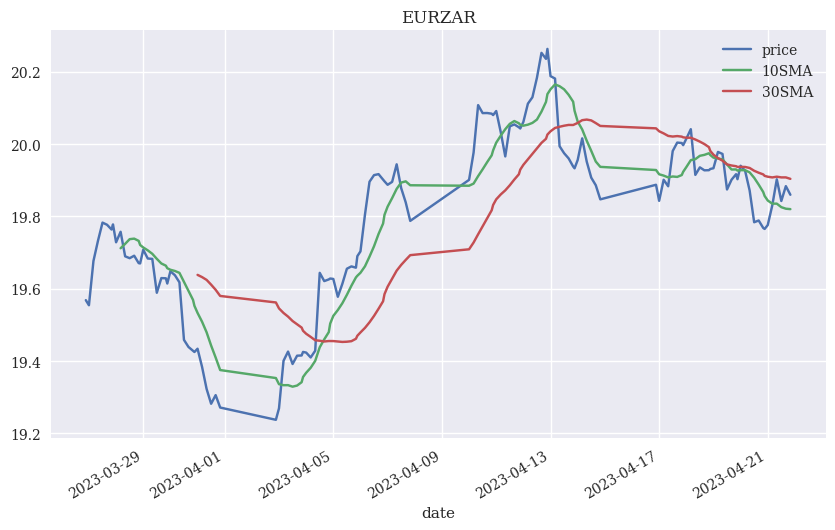

In [99]:
%matplotlib inline
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

df.plot(title='EURZAR', figsize=(10,6))
#plt.figure(figsize=(15, 6))
#plt.plot(df['Close'], label='EURZAR')
#plt.plot(df['10SMA'], label='SMA10')
#plt.plot(df['30SMA'], label='SMA30')
#plt.legend(loc='upper left', fontsize=15)


In [100]:
df['position'] = np.where(df['10SMA'] > df['30SMA'], 1, -1)
df.dropna(inplace=True)

In [101]:
df.info()
df.tail(15)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2023-03-31 00:00:00 to 2023-04-21 20:00:00
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     110 non-null    float64
 1   10SMA     110 non-null    float64
 2   30SMA     110 non-null    float64
 3   position  110 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.3 KB


,price,10SMA,30SMA,position
date,,,,
2023-04-19 20:00:00,19.91660,19.929785,19.938717,-1
2023-04-19 21:15:00,19.90280,19.926515,19.936800,-1
2023-04-20 00:00:00,19.94000,19.927780,19.936870,-1
2023-04-20 04:00:00,19.92600,19.927610,19.936640,-1
2023-04-20 08:00:00,19.87155,19.921655,19.933832,-1
2023-04-20 12:00:00,19.78385,19.906730,19.926105,-1
2023-04-20 16:00:00,19.78865,19.887775,19.920680,-1
2023-04-20 20:00:00,19.76810,19.867325,19.916050,-1
2023-04-20 21:15:00,19.76530,19.856420,19.912023,-1


<Axes: title={'center': 'Market Positioning'}, xlabel='date'>

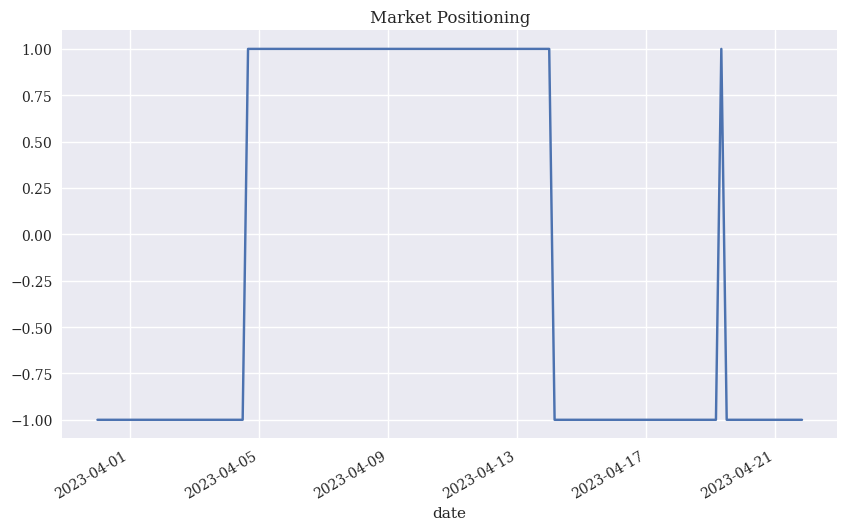

In [102]:
df['position'].plot(x='date', 
                    ylim=[-1.1, 1.1],
                    title='Market Positioning',
                    figsize=(10,6))

In [103]:
df['returns'] = np.log(df['price'] / df['price'].shift(1))


In [104]:
df.tail(15)

,price,10SMA,30SMA,position,returns
date,,,,,
2023-04-19 20:00:00,19.91660,19.929785,19.938717,-1,0.000766
2023-04-19 21:15:00,19.90280,19.926515,19.936800,-1,-0.000693
2023-04-20 00:00:00,19.94000,19.927780,19.936870,-1,0.001867
2023-04-20 04:00:00,19.92600,19.927610,19.936640,-1,-0.000702
2023-04-20 08:00:00,19.87155,19.921655,19.933832,-1,-0.002736
2023-04-20 12:00:00,19.78385,19.906730,19.926105,-1,-0.004423
2023-04-20 16:00:00,19.78865,19.887775,19.920680,-1,0.000243
2023-04-20 20:00:00,19.76810,19.867325,19.916050,-1,-0.001039
2023-04-20 21:15:00,19.76530,19.856420,19.912023,-1,-0.000142


<Axes: >

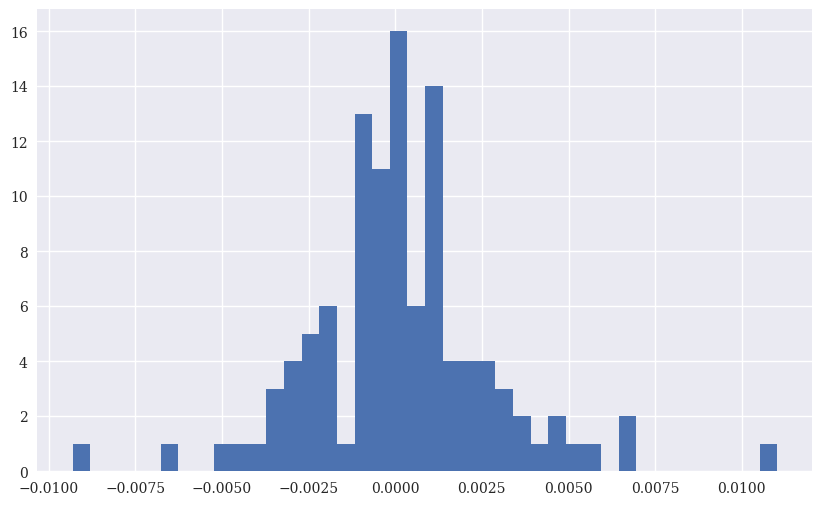

In [105]:
df['returns'].hist(bins=40, figsize=(10,6))

In [106]:
df['strategy'] = df['position'].shift(1) * df['returns']

In [107]:
df.tail(20)

,price,10SMA,30SMA,position,returns,strategy
date,,,,,,
2023-04-19 00:00:00,19.93310,19.962465,19.970620,-1,0.000100,-0.000100
2023-04-19 04:00:00,19.97820,19.960005,19.961128,-1,0.002260,-0.002260
2023-04-19 08:00:00,19.97260,19.957575,19.953958,1,-0.000280,0.000280
2023-04-19 12:00:00,19.87435,19.943570,19.943740,-1,-0.004931,-0.004931
2023-04-19 16:00:00,19.90135,19.929595,19.940652,-1,0.001358,-0.001358
2023-04-19 20:00:00,19.91660,19.929785,19.938717,-1,0.000766,-0.000766
2023-04-19 21:15:00,19.90280,19.926515,19.936800,-1,-0.000693,0.000693
2023-04-20 00:00:00,19.94000,19.927780,19.936870,-1,0.001867,-0.001867
2023-04-20 04:00:00,19.92600,19.927610,19.936640,-1,-0.000702,0.000702


In [108]:
df[['returns','strategy']].sum()

returns     0.021661
strategy    0.008284
dtype: float64

In [109]:
df[['returns','strategy']].sum().apply(np.exp)

returns     1.021897
strategy    1.008319
dtype: float64

<Axes: xlabel='date'>

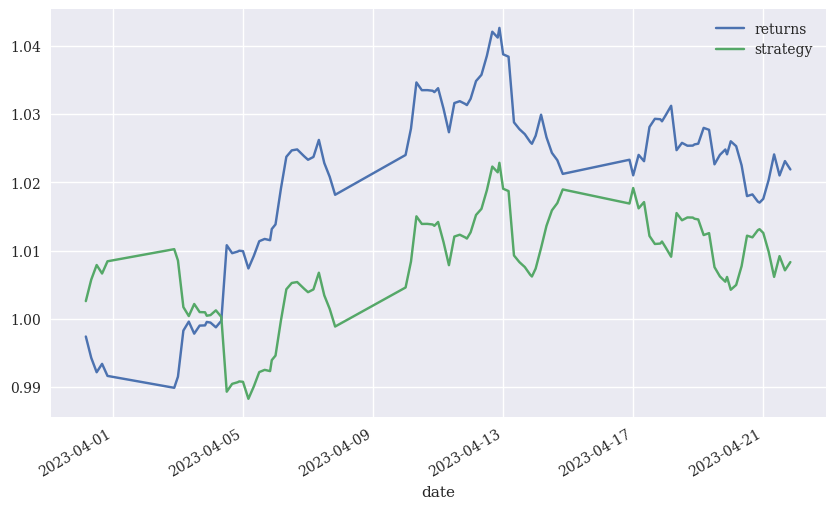

In [110]:
df[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [9]:
app.disconnect()